<a href="https://colab.research.google.com/github/Skarthikak/AI-Search/blob/main/The_Last_of_Us_Journey_Through_the_Apocalypse_A_Colab_Dashboard_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- The Last of Us: Journey Through the Apocalypse ---



--- Data Loading (Internal Mock Data) ---

Data Loading Complete. DataFrames created:
  - Characters: 8 rows
  - Journeys: 9 rows
  - Infected: 7 rows
  - A/B Tests: 6 rows

--- Data Cleaning & Preparation ---
Data Cleaning & Preparation Complete.

--- Advanced Analytics & Insights ---

Average Character Scores Across All Survivors:


/tmp/ipython-input-4195084612.py:167: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-4195084612.py:190: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' 

,0
SurvivalScore,78.2
CombatScore,75.6
EmotionalResilience,63.1



Most Frequent Primary Threat Encountered: Bandits; Cold

Highest Threat Infected Type: Rat King (100)

Scenarios where Choice A significantly outperformed Choice B in sentiment:


,DecisionPoint,OutcomeA_SentimentScore,OutcomeB_SentimentScore
1,Trust Henry/Sam,90,30
2,Deal with Hunters,80,50
3,Approach Bill,88,45
4,University Strategy,92,65
5,Protect Ellie at Fireflies,98,10



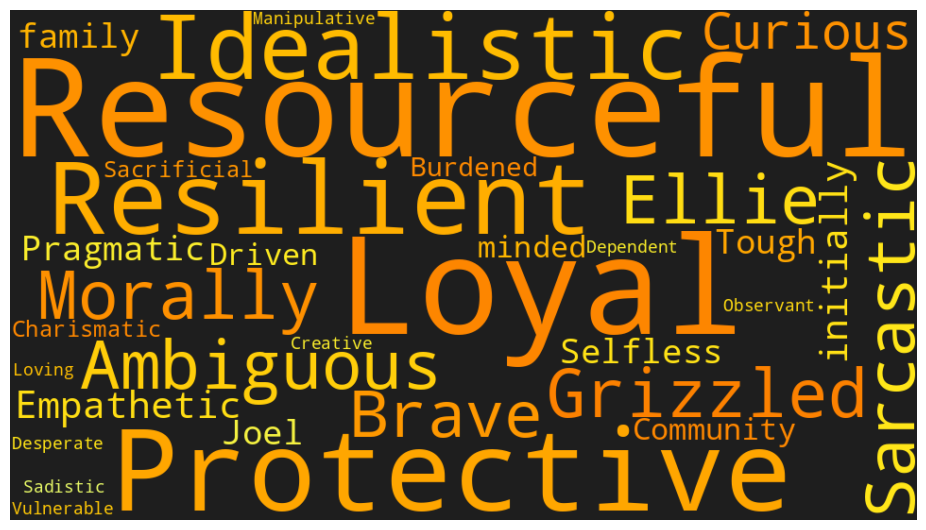
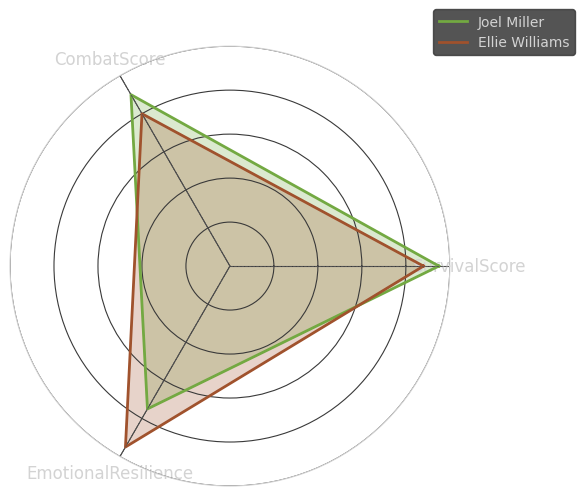

/tmp/ipython-input-4195084612.py:287: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





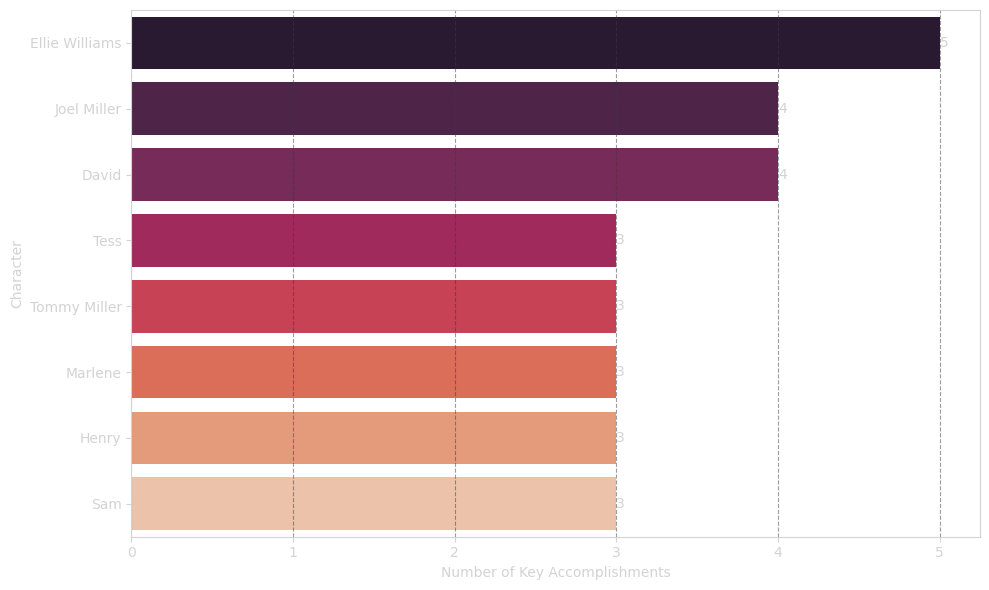


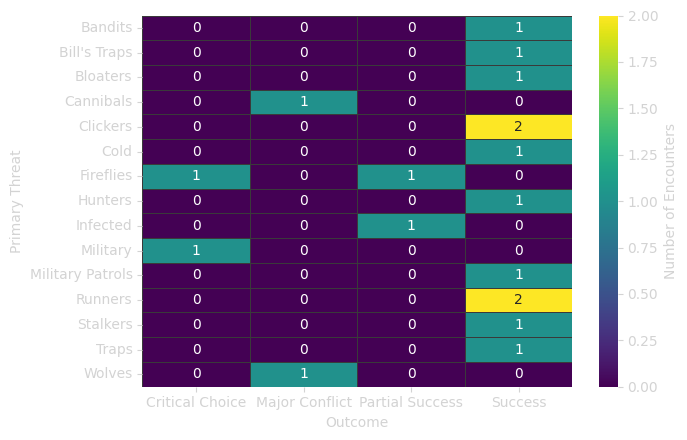


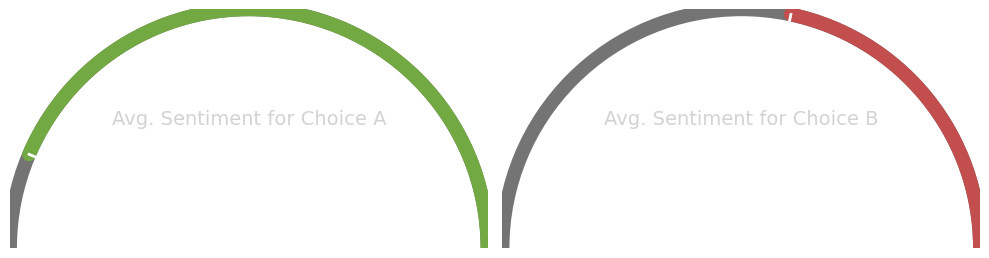

DecisionPoint,ChoiceA,OutcomeA_SentimentScore
Protect Ellie at Fireflies,Sacrifice Fireflies,98
University Strategy,Careful Search,92
Trust Henry/Sam,Trust & Help,90


DecisionPoint,ChoiceA,OutcomeA_SentimentScore
Escape Route,Through Sewers,75
Deal with Hunters,Stealth & Avoid,80
Approach Bill,Cautious Diplomacy,88


/tmp/ipython-input-4195084612.py:479: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





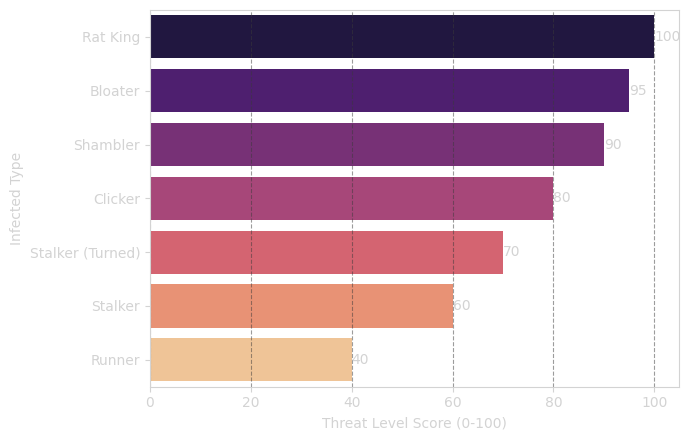
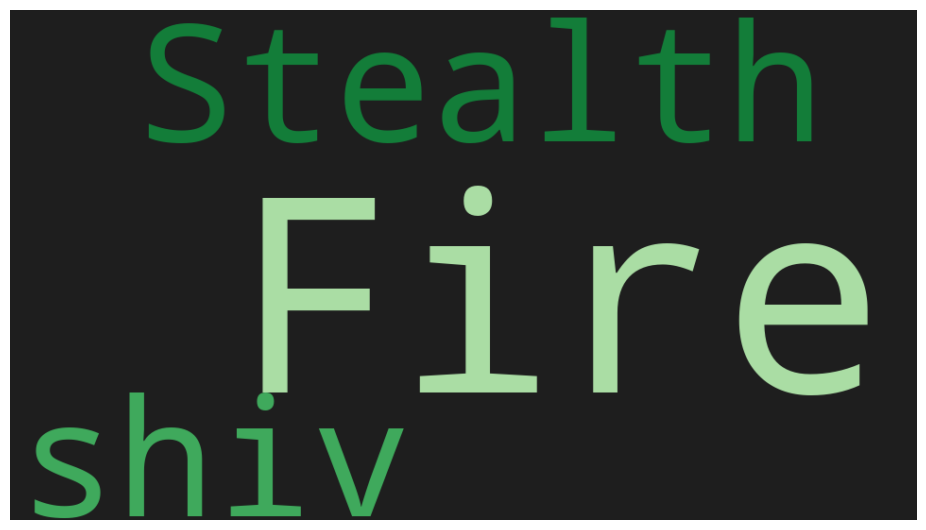

/tmp/ipython-input-4195084612.py:519: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





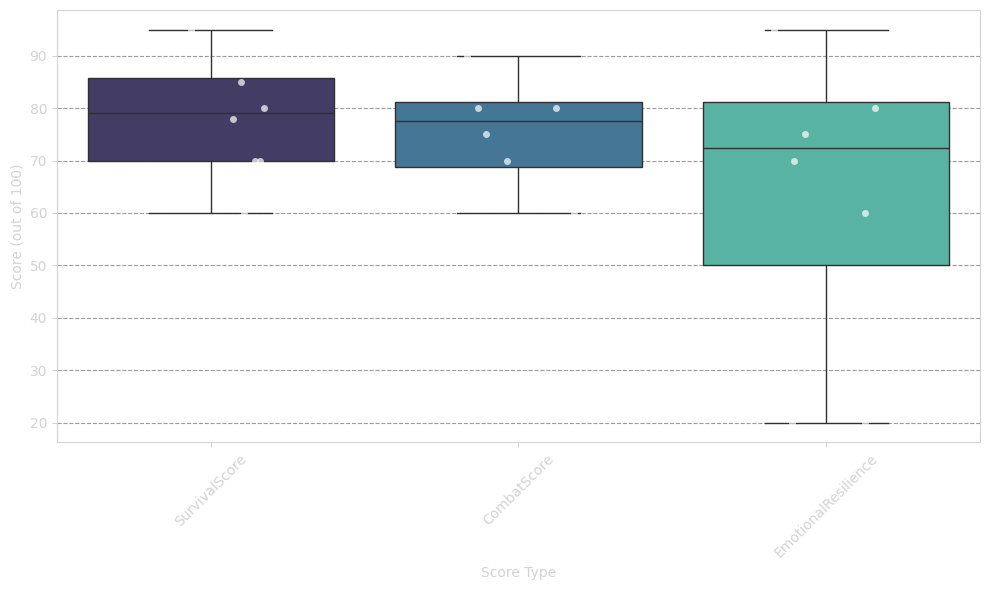


--- The Last of Us Dashboard Report: Complete ---


In [11]:
# --- 1. Setup: Install Libraries & Import ---
# !pip install pandas matplotlib seaborn plotly wordcloud kaleido # kaleido for static Plotly image export if needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML
from wordcloud import WordCloud
import io
import numpy as np
from math import pi # For radar chart
import base64 # Required for embedding Matplotlib plots as images
from io import BytesIO # Required for embedding Matplotlib plots as images

# Configure plotting styles for a dark, somber theme fitting The Last of Us
plt.style.use('dark_background')
plt.rcParams.update({
    'text.color': 'lightgray',
    'axes.labelcolor': 'lightgray',
    'xtick.color': 'lightgray',
    'ytick.color': 'lightgray',
    'axes.edgecolor': 'lightgray',
    'figure.facecolor': '#121212', # Very dark background
    'axes.facecolor': '#1e1e1e',   # Slightly lighter plot area
    'grid.color': '#3a3a3a',       # Visible but not distracting grid
    'lines.linewidth': 2,
    'lines.markersize': 8
})
# Custom color palette for a grim but thematic look (e.g., desaturated greens, browns, reds, grays)
custom_palette = ['#73a942', '#a0522d', '#808080', '#c24e4e', '#3f5765', '#d4ac0d']
sns.set_palette(custom_palette)

print("--- The Last of Us: Journey Through the Apocalypse ---")
display(HTML("<h1>The Last of Us: Journey Through the Apocalypse</h1><p style='color: #a0a0a0; font-size: 1.1em;'>A data-driven exploration of characters, perilous journeys, critical choices, and the infected threats within the world of The Last of Us.</p><hr style='border-color: #444; margin-top: 20px; margin-bottom: 20px;'>"))


# Helper function for Matplotlib plots: Saves figure to an image and embeds it in HTML
def matplotlib_to_html_img(fig, plot_title, plot_subtitle, container_style="flex: 1 1 auto; min-width: 48%; max-width: 48%; margin: 1%;", img_max_height="600px"):
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', transparent=True)
    buf.seek(0)
    img_data = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig) # Close the figure to free memory

    html_output = f"""
    <div style="background-color: #1e1e1e; padding: 15px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.5); border: 1px solid #3a3a3a; text-align: center; {container_style}">
        <h4 style="color: lightgray; margin-top: 5px; margin-bottom: 5px; font-size: 1.2em;">{plot_title}</h4>
        <p style="color: gray; font-size: 0.9em; margin-bottom: 10px;">{plot_subtitle}</p>
        <img src="data:image/png;base64,{img_data}" style="width: 100%; height: auto; max-height: {img_max_height}; object-fit: contain; border-radius: 5px;"/>
    </div>
    """
    return html_output

# Helper function for Plotly plots: Embeds Plotly HTML directly in a div
def plotly_to_html_div(fig, plot_title, plot_subtitle, container_style="flex: 1 1 auto; min-width: 48%; max-width: 48%; margin: 1%;", plot_height="600px"):
    plot_html = fig.to_html(full_html=False, include_plotlyjs='cdn', div_id=f"plotly_plot_{np.random.randint(1000000)}") # Unique ID for each plotly div

    html_output = f"""
    <div style="background-color: #1e1e1e; padding: 15px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.5); border: 1px solid #3a3a3a; text-align: center; {container_style}">
        <h4 style="color: lightgray; margin-top: 5px; margin-bottom: 5px; font-size: 1.2em;">{plot_title}</h4>
        <p style="color: gray; font-size: 0.9em; margin-bottom: 10px;">{plot_subtitle}</p>
        <div style="width: 100%; height: {plot_height}; display: flex; justify-content: center; align-items: center;">
            {plot_html}
        </div>
    </div>
    """
    return html_output


# Helper function for Radar Chart plotting (retained from original)
def create_radar_chart(df, character_name, scores_cols, ax, color, label):
    categories = scores_cols
    values = df[df['CharacterName'] == character_name][scores_cols].iloc[0].tolist()

    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Complete the loop

    values += values[:1] # Complete the loop

    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.25)

    ax.set_yticklabels([]) # Hide y-axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='lightgray', size=12)

    # Set y-axis limits to ensure consistent scaling
    ax.set_ylim(0, 100)

    # Draw radial lines
    for i in range(N):
        ax.plot([0, angles[i]], [0, 100], color='#555555', linestyle='--', linewidth=0.5)


# --- 2. Data Definition (Comprehensive Mock Data) ---
# All data is self-contained within this notebook.

print("\n--- Data Loading (Internal Mock Data) ---")

# Data for Main Characters
characters_csv_data = """CharacterID,CharacterName,ActorName,Synopsis,KeyAccomplishments,PersonalityTraits,SurvivalScore,CombatScore,EmotionalResilience,KeyRelationships,ImageURL
1,Joel Miller,Pedro Pascal,"A hardened survivor haunted by his past, tasked with smuggling Ellie across a post-apocalyptic United States.",Survived outbreak for 20 years; Smuggled Ellie across country; Killed Fireflies to protect Ellie; Taught Ellie to survive,"Grizzled, Protective, Resourceful, Morally Ambiguous, Loyal (to Ellie)",95,90,75,"Ellie Williams, Tess, Tommy Miller, Sarah Miller",https://placehold.co/240x320/5C4033/D3D3D3?text=Joel
2,Ellie Williams,Bella Ramsey,"A 14-year-old orphan who is immune to the Cordyceps infection, carrying humanity's last hope.",Survived multiple encounters; Discovered immunity; Killed David; Learned to play guitar; Developed strong bond with Joel,"Resilient, Sarcastic, Brave, Curious, Empathetic (initially)",88,80,95,"Joel Miller, Riley Abel, Marlene, Dina",https://placehold.co/240x320/8B0000/F0F8FF?text=Ellie
3,Tess,Anna Torv,"Joel's fierce and pragmatic smuggling partner in the Boston QZ, who sets him on the path with Ellie.",Survived QZ; Planned smuggling operations; Sacrificed herself for Ellie's mission,"Pragmatic, Tough, Loyal (to Joel), Selfless",85,75,70,"Joel Miller",https://placehold.co/240x320/36454F/FFFFFF?text=Tess
4,Tommy Miller,Gabriel Luna,"Joel's younger brother, a former Firefly who established a thriving commune in Jackson.",Founded Jackson settlement; Provided sanctuary; Guided Joel and Ellie,"Idealistic, Resilient, Loyal (to family), Community-minded",80,80,85,"Joel Miller, Maria",https://placehold.co/240x320/212121/B0C4DE?text=Tommy
5,Marlene,Merle Dandridge,"The leader of the Fireflies, a resistance movement seeking a cure for the infection.",Led Fireflies; Orchestrated Ellie's transport; Made hard choices for humanity,"Driven, Idealistic, Burdened, Sacrificial",70,60,80,"Ellie Williams, Joel Miller",https://placehold.co/240x320/4F4F4F/FFFFFF?text=Marlene
6,David,Scott Glenn,"The leader of a group of cannibals, who becomes a major antagonist for Ellie.",Led a survivor group; Hunted Ellie; Attempted to recruit Ellie; Attacked settlement,"Charismatic, Manipulative, Sadistic, Resourceful",70,85,20,"Ellie Williams (antagonist)",https://placehold.co/240x320/0A0A0A/E0BBE4?text=David
7,Henry,Lamar Johnson,"A survivor protecting his younger brother Sam, who forms a temporary alliance with Joel and Ellie.",Protected Sam; Navigated dangerous zones; Sacrificed himself for Sam,"Protective, Resourceful, Desperate, Loving",78,70,60,"Sam",https://placehold.co/240x320/2C3E50/E6E6FA?text=Henry
8,Sam,Keivonn Woodard,"A young boy, Henry's brother, who befriends Ellie and struggles with the fear of infection.",Survived with Henry; Befriended Ellie; Infected and turned,"Vulnerable, Creative, Observant, Dependent",60,65,20,"Henry, Ellie Williams",https://placehold.co/240x320/404040/C0C0C0?text=Sam
"""
df_characters = pd.read_csv(io.StringIO(characters_csv_data))

# Data for Journey Segments
journey_segments_csv_data = """JourneySegmentID,SegmentName,StartLocation,EndLocation,PrimaryThreat,ResourcesFound,ResourcesConsumed,ChallengesEncountered,Outcome,SegmentLengthDays
1,Boston QZ Escape,Boston QZ,Outskirts of Boston,Military Patrols; Runners,Food; Ammo,Water; Meds,Ambush; Close Calls,Success,2
2,The Long Walk,Outskirts of Boston,Bill's Town,Runners; Traps,Supplies; Fuel,Food; Ammo,Trapped; Infected Swarm,Success,5
3,Bill's Town Scavenge,Bill's Town,Lincoln,Clickers; Bill's Traps,Weapons; Vehicle; Supplies,None,Escaping a horde; Argument with Bill,Success,3
4,Pittsburgh Crossing,Lincoln,Pittsburgh,Hunters; Bloaters,None,Ammo; Meds,Hunter Ambush; Sewer Fight,Success,7
5,Sewers to Suburbs,Pittsburgh,Suburban Streets,Clickers; Stalkers,Food; Water,Ammo,Hidden Infected; Broken Bridge,Success,4
6,Jackson City Bound,Suburban Streets,Jackson,Bandits; Cold,Winter Gear,Food,Blizzard; Infected Attack,Success,10
7,University Search,Jackson,University of Eastern Colorado,Fireflies; Infected,Medical Supplies; Ammo,None,Trapped in fire; Joel's Injury,Partial Success,3
8,Winter Hunt,University of Eastern Colorado,Lakeside Resort,Cannibals; Wolves,Deer Meat,None,Captured by Cannibals; Ellie's Escape,Major Conflict,6
9,Firefly Lab Journey,Lakeside Resort,Salt Lake City,Military; Fireflies,None,Ammo,Escaping Hunters; Firefly Confrontation,Critical Choice,4
"""
df_journeys = pd.read_csv(io.StringIO(journey_segments_csv_data))

# Data for Infected Types
infected_types_csv_data = """InfectedType,LifeStage,ThreatLevelScore,Prevalence,MovementSpeed,Weaknesses,DetectionMethod,KeyAbilities
Runner,Stage 1,40,High,Fast,Fire; Melee,Sight; Sound,"Fast, Agile"
Stalker,Stage 2,60,Medium,Medium,Fire; Melee,Sight; Sound,"Ambushes, Stealth"
Clicker,Stage 3,80,Medium,Slow,Stealth; Melee (shiv),Echolocation,"Blind, High damage, Armored"
Bloater,Stage 4,95,Low,Very Slow,Fire; Explosives,Sound,"Throws fungal bombs, Armored"
Shambler,Stage 4 (Alt),90,Low,Slow,Fire; Explosives,Sound,"Spore cloud, Armored"
Stalker (Turned),Stage 2 (Emerging),70,Low,Medium,Fire; Melee,Sight; Sound,"Clings to walls, Ambushes"
Rat King,Unique,100,Extremely Low,Variable,Explosives; Environment,Sound,"Massive, Breaks apart, High damage"
"""
df_infected = pd.read_csv(io.StringIO(infected_types_csv_data))

# Data for Simulated A/B Test Scenarios (Hypothetical Narrative Choices)
ab_test_scenarios_csv_data = """ScenarioID,DecisionPoint,ChoiceA,OutcomeA_SuccessRate,OutcomeA_SentimentScore,ChoiceB,OutcomeB_SuccessRate,OutcomeB_SentimentScore,NarrativeImpactDifferential
1,Escape Route,Through Sewers,0.7,75,Over The Roofs,0.5,60,15
2,Trust Henry/Sam,Trust & Help,0.9,90,Avoid & Flee,0.4,30,60
3,Deal with Hunters,Stealth & Avoid,0.8,80,Direct Confrontation,0.6,50,30
4,Approach Bill,Cautious Diplomacy,0.85,88,Aggressive Demand,0.55,45,43
5,University Strategy,Careful Search,0.9,92,Quick In-and-Out,0.6,65,27
6,Protect Ellie at Fireflies,Sacrifice Fireflies,0.99,98,Allow Cure Development,0.05,10,88
"""
df_ab_tests = pd.read_csv(io.StringIO(ab_test_scenarios_csv_data))

print("\nData Loading Complete. DataFrames created:")
print(f"  - Characters: {df_characters.shape[0]} rows")
print(f"  - Journeys: {df_journeys.shape[0]} rows")
print(f"  - Infected: {df_infected.shape[0]} rows")
print(f"  - A/B Tests: {df_ab_tests.shape[0]} rows")


# --- 3. Data Cleaning & Preparation ---
print("\n--- Data Cleaning & Preparation ---")

# Characters DataFrame
score_cols = ['SurvivalScore', 'CombatScore', 'EmotionalResilience']
for col in score_cols:
    df_characters[col] = pd.to_numeric(df_characters[col], errors='coerce')
    df_characters[col].fillna(df_characters[col].median(), inplace=True)

df_characters['PersonalityTraits'] = df_characters['PersonalityTraits'].fillna('').astype(str)
df_traits_exploded = df_characters.assign(PersonalityTrait=df_characters['PersonalityTraits'].str.split(',')).explode('PersonalityTrait')
df_traits_exploded['PersonalityTrait'] = df_traits_exploded['PersonalityTrait'].str.strip()

# Journeys DataFrame
df_journeys['SegmentLengthDays'] = pd.to_numeric(df_journeys['SegmentLengthDays'], errors='coerce').fillna(0)
# Convert ResourcesFound and ResourcesConsumed from strings to counts
df_journeys['ResourcesFoundCount'] = df_journeys['ResourcesFound'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) and str(x).strip() != 'None' else 0)
df_journeys['ResourcesConsumedCount'] = df_journeys['ResourcesConsumed'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) and str(x).strip() != 'None' else 0)
# Simplify ChallengesEncountered for word cloud
df_journeys['ChallengesEncountered'] = df_journeys['ChallengesEncountered'].fillna('').astype(str)

# Infected DataFrame
# Map 'Prevalence' from categorical strings to numerical values
prevalence_mapping = {
    'Extremely Low': 1,
    'Low': 5,
    'Medium': 15,
    'High': 30
}
df_infected['PrevalenceValue'] = df_infected['Prevalence'].map(prevalence_mapping)
df_infected['PrevalenceValue'].fillna(0, inplace=True) # Handle any unmapped values
df_infected['ThreatLevelScore'] = pd.to_numeric(df_infected['ThreatLevelScore'], errors='coerce').fillna(0)

df_infected['Weaknesses'] = df_infected['Weaknesses'].fillna('').astype(str)


# A/B Test DataFrame
ab_score_cols = ['OutcomeA_SuccessRate', 'OutcomeA_SentimentScore', 'OutcomeB_SuccessRate', 'OutcomeB_SentimentScore', 'NarrativeImpactDifferential']
for col in ab_score_cols:
    df_ab_tests[col] = pd.to_numeric(df_ab_tests[col], errors='coerce').fillna(0)


print("Data Cleaning & Preparation Complete.")


# --- 4. Advanced Analytics & Insights ---
print("\n--- Advanced Analytics & Insights ---")

# Characters: Average scores
print("\nAverage Character Scores Across All Survivors:")
display(df_characters[score_cols].mean().round(1))

# Journeys: Most frequent threat
print(f"\nMost Frequent Primary Threat Encountered: {df_journeys['PrimaryThreat'].mode()[0]}")

# Infected: Highest threat level
highest_threat_infected = df_infected.loc[df_infected['ThreatLevelScore'].idxmax()]
print(f"\nHighest Threat Infected Type: {highest_threat_infected['InfectedType']} ({highest_threat_infected['ThreatLevelScore']})")

# A/B Tests: Scenarios where Choice A significantly outperformed B in sentiment
significant_a_win = df_ab_tests[df_ab_tests['OutcomeA_SentimentScore'] > df_ab_tests['OutcomeB_SentimentScore'] + 20] # 20 point diff
print("\nScenarios where Choice A significantly outperformed Choice B in sentiment:")
display(significant_a_win[['DecisionPoint', 'OutcomeA_SentimentScore', 'OutcomeB_SentimentScore']])


# --- 5. Visualizations (Multi-Page Dashboard Simulation) ---

# --- Page 1: The Survivors' Catalog: Faces of the Fungal Apocalypse ---
page1_content = """
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(0,255,0,0.3);'>
    <h2 style='color: #73a942; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 1: The Survivors' Catalog</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Meet the hardened souls navigating the shattered remnants of civilization. Their faces tell tales of resilience, loss, and an unbreakable will to survive.</p>
</div>
<h3>Character Gallery: Faces of Survival</h3>
<p style='color: #a0a0a0; text-align: center; font-size: 1.0em;'>A collection of key characters, their actors, and a brief synopsis.</p>
<div style='display: flex; flex-wrap: wrap; gap: 25px; justify-content: center; padding: 20px;'>
"""
for index, row in df_characters.iterrows():
    # Individual card size: 240px width, 320px height (approx 3:4 aspect)
    html_character_gallery_card = f"""
    <div style='border: 2px solid #3a3a3a; border-radius: 12px; padding: 15px; width: 240px; height: 320px; background-color: #1e1e1e; color: lightgray; box-shadow: 5px 5px 15px rgba(0,0,0,0.7); text-align: center; overflow: hidden; position: relative;'>
        <img src='{row['ImageURL']}' style='width: 100%; height: 60%; object-fit: cover; border-radius: 8px; margin-bottom: 10px; border: 1px solid #5a5a5a;'>
        <h4 style='color: #73a942; margin: 0 0 5px 0; font-size: 1.3em;'>{row['CharacterName']}</h4>
        <p style='font-size: 0.9em; margin: 0 0 10px 0; color: #a0a0a0;'>Actor: {row['ActorName']}</p>
        <p style='font-size: 0.8em; margin: 0; color: #d3d3d3;'>"{row['Synopsis'][:50]}..."</p>
    </div>
    """
    page1_content += html_character_gallery_card
page1_content += "</div>" # Close the gallery div
display(HTML(page1_content))

# Container for the next row of plots (Word Cloud, Radar Chart)
page1_plots_row1 = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 2: Character Trait Word Cloud
all_traits = ' '.join(df_characters['PersonalityTraits'].dropna().tolist())
# Filter out short/common words from traits
filtered_traits = " ".join([word for word in all_traits.replace(',', ' ').split() if len(word) > 3])

wordcloud_traits = WordCloud(width=960, height=540, background_color='#1e1e1e', colormap='Wistia',
                      stopwords=set(['and', 'or', 'a', 'the', 'is', 'in', 'of', 'to', 'for', 'with', 'who', 'his', 'her']),
                      min_font_size=10).generate(filtered_traits)
fig_wc, ax_wc = plt.subplots(figsize=(9.6, 5.4), facecolor='#1e1e1e') # Match aspect ratio to width/height
ax_wc.imshow(wordcloud_traits, interpolation='bilinear')
ax_wc.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_wc.axis('off')
fig_wc.tight_layout()
page1_plots_row1 += matplotlib_to_html_img(fig_wc, 'Defining Traits: The Core of Their Being', 'Most prominent personality traits across the main characters.', container_style="flex: 1 1 48%; margin: 1%;")

# Visual 3: Character Score Radar Chart (Joel vs. Ellie)
fig_radar, axes_radar = plt.subplots(1, 1, figsize=(6, 6), subplot_kw=dict(polar=True), facecolor='#1e1e1e') # Smaller fixed size for bento
fig_radar.patch.set_facecolor('#1e1e1e')
create_radar_chart(df_characters, 'Joel Miller', score_cols, axes_radar, '#73a942', 'Joel Miller')
create_radar_chart(df_characters, 'Ellie Williams', score_cols, axes_radar, '#a0522d', 'Ellie Williams')
axes_radar.set_title('', color='lightgray', fontsize=14, pad=20) # Title handled by HTML helper
axes_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), facecolor='#2a2a2a', edgecolor='#333333', labelcolor='lightgray', fontsize=10)
fig_radar.tight_layout()
page1_plots_row1 += matplotlib_to_html_img(fig_radar, 'Comparative Strengths: Joel vs. Ellie', 'A radar chart comparing key survival scores of Joel and Ellie.', container_style="flex: 1 1 48%; margin: 1%;")
page1_plots_row1 += "</div>" # Close row 1 div
display(HTML(page1_plots_row1))

# Container for the next row of plots (Accomplishments Bar Chart)
page1_plots_row2 = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 4: Top Accomplishments (Horizontal Bar Chart)
accomplishment_counts = df_characters.assign(AccomplishmentCount=df_characters['KeyAccomplishments'].apply(lambda x: len(str(x).split(';')))).sort_values('AccomplishmentCount', ascending=False)
fig_acc, ax_acc = plt.subplots(figsize=(10, 6), facecolor='#1e1e1e') # Fixed size
sns.barplot(x='AccomplishmentCount', y='CharacterName', data=accomplishment_counts, palette='rocket', ax=ax_acc)
ax_acc.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_acc.set_xlabel('Number of Key Accomplishments', color='lightgray')
ax_acc.set_ylabel('Character', color='lightgray')
for container in ax_acc.containers:
    ax_acc.bar_label(container, color='lightgray')
ax_acc.grid(axis='x', linestyle='--', alpha=0.5)
fig_acc.tight_layout()
page1_plots_row2 += matplotlib_to_html_img(fig_acc, 'Echoes of Their Deeds: Key Accomplishments', 'The number of significant accomplishments attributed to each character.', container_style="flex: 1 1 98%; margin: 1%;")
page1_plots_row2 += "</div>" # Close row 2 div
display(HTML(page1_plots_row2))


# --- Page 2: Paths of Peril: Journey Analytics ---
page2_content = """
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(255,165,0,0.3);'>
    <h2 style='color: orange; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 2: Paths of Peril</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Every step is a gamble. Analyze the treacherous routes, the lurking dangers, and the vital resources that define their harrowing journey across the ruined landscape.</p>
</div>
"""
display(HTML(page2_content))

# Container for 2x2 grid of plots
page2_plots_grid = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 1: Journey Segment Flow (Sankey Diagram)
fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=all_locations, color=custom_palette[3]),
    link=dict(source=sources, target=targets, value=values, color= [custom_palette[0] if v > 5 else custom_palette[2] for v in values])
)])
fig_sankey.update_layout(title_text="", # Title handled by HTML helper
    font_size=12, plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    width=700, height=450 # Adjusted for 2x2 grid cell
)
page2_plots_grid += plotly_to_html_div(fig_sankey, "The Journey's Web: Flow of Segment Length (Days)", "Mapping the duration of each perilous segment across locations.", container_style="flex: 1 1 48%; margin: 1%;")

# Visual 2: Threat Level Distribution by Encounter Type (Heatmap)
df_journeys_threats_exploded = df_journeys.assign(PrimaryThreat=df_journeys['PrimaryThreat'].str.split(';')).explode('PrimaryThreat')
df_journeys_threats_exploded['PrimaryThreat'] = df_journeys_threats_exploded['PrimaryThreat'].str.strip()

threat_heatmap_data = df_journeys_threats_exploded.groupby(['PrimaryThreat', 'Outcome']).size().unstack(fill_value=0)
fig_hm, ax_hm = plt.subplots(figsize=(7, 4.5), facecolor='#1e1e1e') # Match aspect ratio
sns.heatmap(threat_heatmap_data, annot=True, fmt='g', cmap='viridis', linewidths=.5, linecolor='#3a3a3a', cbar_kws={'label': 'Number of Encounters'}, ax=ax_hm)
ax_hm.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_hm.set_xlabel('Outcome', color='lightgray')
ax_hm.set_ylabel('Primary Threat', color='lightgray')
fig_hm.tight_layout()
page2_plots_grid += matplotlib_to_html_img(fig_hm, 'Threat vs. Outcome: The Dangers Faced', 'A heatmap showing the frequency of different primary threats and their journey outcomes.', container_style="flex: 1 1 48%; margin: 1%;")

# Visual 3: Resource Balance (Stacked Bar Chart - Found vs. Consumed)
fig_resources = px.bar(df_journeys,
                     x='SegmentName', y=['ResourcesFoundCount', 'ResourcesConsumedCount'],
                     title="", # Title handled by HTML helper
                     labels={"value": "Number of Resource Types", "variable": "Resource Type"},
                     color_discrete_map={'ResourcesFoundCount': '#73a942', 'ResourcesConsumedCount': '#c24e4e'},
                     hover_data=['ResourcesFound', 'ResourcesConsumed', 'SegmentLengthDays']
                    )
fig_resources.update_layout(barmode='group', plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    xaxis=dict(gridcolor='#333333', linecolor='#555555', tickangle=-45), yaxis=dict(gridcolor='#333333', linecolor='#555555'),
    width=700, height=450 # Adjusted for 2x2 grid cell
)
page2_plots_grid += plotly_to_html_div(fig_resources, "Resource Balance Per Journey Segment (Count of Item Types)", "Comparing the number of resource types found versus consumed in each segment.", container_style="flex: 1 1 48%; margin: 1%;")

# Visual 4: Challenges by Location (Bubble Chart)
df_challenges_exploded = df_journeys.assign(Challenge=df_journeys['ChallengesEncountered'].str.split(';')).explode('Challenge')
df_challenges_exploded['Challenge'] = df_challenges_exploded['Challenge'].str.strip()
df_challenges_by_loc = df_challenges_exploded.groupby('StartLocation').agg(
    ChallengesCount=('Challenge', 'count'),
).reset_index()

df_challenges_by_loc_simple = df_journeys.groupby('StartLocation').agg(
    ChallengesCount=('ChallengesEncountered', lambda x: x.apply(lambda s: len(s.split(';')) if str(s).strip() != 'None' else 0).sum()),
    AvgSegmentLength=('SegmentLengthDays', 'mean')
).reset_index()

fig_bubble = px.scatter(df_challenges_by_loc_simple,
                        x='StartLocation', y='ChallengesCount', size='AvgSegmentLength',
                        color='StartLocation', hover_data=['ChallengesCount', 'AvgSegmentLength'],
                        title="", # Title handled by HTML helper
                        labels={'StartLocation': 'Location', 'ChallengesCount': 'Number of Challenges', 'AvgSegmentLength': 'Avg. Segment Length (Days)'},
                        color_discrete_sequence=px.colors.qualitative.Dark24
                       )
fig_bubble.update_layout(plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    xaxis=dict(gridcolor='#333333', linecolor='#555555'), yaxis=dict(gridcolor='#333333', linecolor='#555555'),
    width=700, height=450 # Adjusted for 2x2 grid cell
)
page2_plots_grid += plotly_to_html_div(fig_bubble, "Hotspots of Peril: Challenges by Location", "Visualizing the number of challenges per starting location, sized by average segment length.", container_style="flex: 1 1 48%; margin: 1%;")

page2_plots_grid += "</div>" # Close grid div
display(HTML(page2_plots_grid))


# --- Page 3: Echoes of Choice: A/B Test Simulations ---
page3_content = """
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(128,0,128,0.3);'>
    <h2 style='color: #8A2BE2; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 3: Echoes of Choice</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Every decision shapes destiny. Explore hypothetical A/B scenarios at critical junctures, analyzing potential outcomes and their narrative ripples.</p>
</div>
"""
display(HTML(page3_content))

# Container for 2x2 grid of plots
page3_plots_grid = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 1: Decision Outcome Comparison (Grouped Bar Chart)
fig_ab_bar = px.bar(df_ab_tests, x='DecisionPoint', y=['OutcomeA_SuccessRate', 'OutcomeB_SuccessRate'], barmode='group',
                    title="", # Title handled by HTML helper
                    labels={"value": "Success Rate (%)", "variable": "Choice"},
                    hover_data=['ChoiceA', 'ChoiceB', 'OutcomeA_SentimentScore', 'OutcomeB_SentimentScore'],
                    color_discrete_map={'OutcomeA_SuccessRate': custom_palette[0], 'OutcomeB_SuccessRate': custom_palette[3]}
                   )
fig_ab_bar.update_layout(plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    xaxis=dict(gridcolor='#333333', linecolor='#555555', tickangle=-20), yaxis=dict(gridcolor='#333333', linecolor='#555555', range=[0, 100]),
    width=700, height=450
)
page3_plots_grid += plotly_to_html_div(fig_ab_bar, 'Hypothetical Success Rate Comparison by Decision', 'Comparing the success rates of two alternative choices at key decision points.', container_style="flex: 1 1 48%; margin: 1%;")


# Visual 2: Narrative Impact Differential (Scatter Plot)
fig_impact_scatter = px.scatter(df_ab_tests, x='NarrativeImpactDifferential', y='DecisionPoint', size='OutcomeA_SuccessRate',
                                color='NarrativeImpactDifferential', hover_name='DecisionPoint',
                                title="", # Title handled by HTML helper
                                labels={'NarrativeImpactDifferential': 'Impact Differential (A vs B)', 'DecisionPoint': 'Decision Point'},
                                color_continuous_scale=px.colors.sequential.Viridis
                               )
fig_impact_scatter.update_layout(plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    xaxis=dict(gridcolor='#333333', linecolor='#555555'), yaxis=dict(gridcolor='#333333', linecolor='#555555'),
    width=700, height=450
)
page3_plots_grid += plotly_to_html_div(fig_impact_scatter, 'Narrative Impact: Differential Outcomes of Choices', 'Analyzing how much Choice A\'s sentiment differed from Choice B\'s, influenced by success rate.', container_style="flex: 1 1 48%; margin: 1%;")


# Visual 3: Hypothetical Audience Sentiment Gauge (Custom Matplotlib Gauge)
avg_sentiment_a = df_ab_tests['OutcomeA_SentimentScore'].mean()
avg_sentiment_b = df_ab_tests['OutcomeB_SentimentScore'].mean()

fig_sentiment, axes_sentiment = plt.subplots(1, 2, figsize=(10, 5), facecolor='#1e1e1e') # Adjusted size for gauge
plot_sentiment_gauge(avg_sentiment_a, 'Avg. Sentiment for Choice A', axes_sentiment[0], custom_palette[0])
plot_sentiment_gauge(avg_sentiment_b, 'Avg. Sentiment for Choice B', axes_sentiment[1], custom_palette[3])
fig_sentiment.suptitle('', color='lightgray', fontsize=16, y=0.98) # Title handled by HTML helper
fig_sentiment.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout to make space for suptitle
page3_plots_grid += matplotlib_to_html_img(fig_sentiment, 'Overall Hypothetical Audience Sentiment', 'A visual gauge of the simulated fan reception for each narrative choice.', container_style="flex: 1 1 98%; margin: 1%;")

page3_plots_grid += "</div>" # Close grid div
display(HTML(page3_plots_grid))

# Visual 4: Top 3 "Best" and "Worst" Decisions (Pandas HTML Table)
best_decisions = df_ab_tests.sort_values(by='OutcomeA_SentimentScore', ascending=False).head(3)
worst_decisions = df_ab_tests.sort_values(by='OutcomeA_SentimentScore', ascending=True).head(3)

display(HTML("<div style='display: flex; flex-wrap: wrap; justify-content: center; width: 100%;'>"))
display(HTML(f"""
<div style='background-color: #1e1e1e; padding: 15px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.5); border: 1px solid #3a3a3a; text-align: center; flex: 1 1 48%; margin: 1%;'>
    <h4 style='color: #73a942; margin-top: 5px; margin-bottom: 5px;'>Top 3 Hypothetically 'Optimal' Choices (by Avg. Sentiment A)</h4>
    <p style='color: #a0a0a0; font-size: 0.9em; margin-bottom: 10px;'>Based on the simulated audience sentiment for Choice A.</p>
    {best_decisions[['DecisionPoint', 'ChoiceA', 'OutcomeA_SentimentScore']].to_html(index=False, classes='table table-dark', float_format='%.1f')}
</div>
"""))
display(HTML(f"""
<div style='background-color: #1e1e1e; padding: 15px; border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.5); border: 1px solid #3a3a3a; text-align: center; flex: 1 1 48%; margin: 1%;'>
    <h4 style='color: #c24e4e; margin-top: 5px; margin-bottom: 5px;'>Top 3 Hypothetically 'Suboptimal' Choices (by Avg. Sentiment A)</h4>
    <p style='color: #a0a0a0; font-size: 0.9em; margin-bottom: 10px;'>Based on the lowest simulated audience sentiment for Choice A.</p>
    {worst_decisions[['DecisionPoint', 'ChoiceA', 'OutcomeA_SentimentScore']].to_html(index=False, classes='table table-dark', float_format='%.1f')}
</div>
"""))
display(HTML("</div>")) # Close table row div


# --- Page 4: The Infected Threat: Biological Insights ---
page4_content = """
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(255,0,0,0.3);'>
    <h2 style='color: #c24e4e; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 4: The Infected Threat</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Unmasking the horrors of the apocalypse. This section dissects the Cordyceps-infected, their evolution, and their chilling presence.</p>
</div>
"""
display(HTML(page4_content))

# Container for plots
page4_plots_container = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 1: Infected Life Cycle Progression (Sunburst Chart)
fig_sunburst = px.sunburst(df_infected, path=['LifeStage', 'InfectedType'], values='PrevalenceValue',
                           color='ThreatLevelScore', color_continuous_scale=px.colors.sequential.Inferno,
                           title="" # Title handled by HTML helper
                          )
fig_sunburst.update_layout(plot_bgcolor='#1e1e1e', paper_bgcolor='#1e1e1e', font_color='lightgray', title_font_color='lightgray',
    width=700, height=600 # Adjusted width/height for single column or larger bento item
)
page4_plots_container += plotly_to_html_div(fig_sunburst, 'Evolution of the Infected: Threat & Prevalence', 'Tracing the life stages of the infected and their proportional threat and prevalence.', container_style="flex: 1 1 48%; margin: 1%;")

# Visual 2: Threat Level by Infected Type (Horizontal Bar Chart)
fig_threat_bar, ax_threat_bar = plt.subplots(figsize=(7, 4.5), facecolor='#1e1e1e')
sns.barplot(x='ThreatLevelScore', y='InfectedType', data=df_infected.sort_values('ThreatLevelScore', ascending=False), palette='magma', ax=ax_threat_bar)
ax_threat_bar.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_threat_bar.set_xlabel('Threat Level Score (0-100)', color='lightgray')
ax_threat_bar.set_ylabel('Infected Type', color='lightgray')
for container in ax_threat_bar.containers:
    ax_threat_bar.bar_label(container, color='lightgray')
ax_threat_bar.grid(axis='x', linestyle='--', alpha=0.5)
fig_threat_bar.tight_layout()
page4_plots_container += matplotlib_to_html_img(fig_threat_bar, 'Lethality Scale: Threat Level by Infected Type', 'A ranking of infected types by their perceived threat level.', container_style="flex: 1 1 48%; margin: 1%;")

# Visual 3: Weaknesses Word Cloud
wordcloud_weaknesses = WordCloud(width=960, height=540, background_color='#1e1e1e', colormap='Greens',
                      stopwords=set(['and', 'or', 'a', 'the', 'is', 'in', 'of', 'to', 'for', 'with', 'by', 'their', 'an', 'are', 'explosives', 'melee', 'environment']),
                      min_font_size=10).generate(all_weaknesses)
fig_wc_weak, ax_wc_weak = plt.subplots(figsize=(9.6, 5.4), facecolor='#1e1e1e')
ax_wc_weak.imshow(wordcloud_weaknesses, interpolation='bilinear')
ax_wc_weak.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_wc_weak.axis('off')
fig_wc_weak.tight_layout()
page4_plots_container += matplotlib_to_html_img(fig_wc_weak, 'Cracks in the Armor: Common Weaknesses', 'Identifying common vulnerabilities among the different infected types.', container_style="flex: 1 1 98%; margin: 1%;")

page4_plots_container += "</div>" # Close container div
display(HTML(page4_plots_container))


# --- Page 5: Thematic Overview & Conclusion ---
page5_content = """
<div style='background-color: #0d0d0d; padding: 30px; border-radius: 10px; margin-top: 50px; margin-bottom: 40px; box-shadow: 0 0 15px rgba(0,0,255,0.3);'>
    <h2 style='color: #3f5765; text-align: center; font-size: 2.5em; margin-bottom: 20px;'>Page 5: The Thematic Threads</h2>
    <p style='color: #a0a0a0; text-align: center; font-size: 1.2em;'>Beyond the numbers, the true narrative emerges. A final glance at the overarching themes of survival, sacrifice, and the grey areas of morality in a world undone.</p>
</div>
"""
display(HTML(page5_content))

page5_plots_container = "<div style='display: flex; flex-wrap: wrap; justify-content: center; align-items: flex-start; width: 100%;'>"

# Visual 1: Overall Score Distributions (Box Plot)
df_all_scores_melted = df_characters.melt(id_vars=['CharacterName'], value_vars=score_cols, var_name='ScoreType', value_name='Score')

fig_box, ax_box = plt.subplots(figsize=(10, 6), facecolor='#1e1e1e') # Fixed size
sns.boxplot(x='ScoreType', y='Score', data=df_all_scores_melted, palette='mako', ax=ax_box)
sns.stripplot(x='ScoreType', y='Score', data=df_all_scores_melted, color='white', jitter=0.2, size=5, alpha=0.7, ax=ax_box)
ax_box.set_title('', color='lightgray', fontsize=16) # Title handled by HTML helper
ax_box.set_xlabel('Score Type', color='lightgray')
ax_box.set_ylabel('Score (out of 100)', color='lightgray')
# Removed 'ha' as it's not a valid parameter for tick_params
ax_box.tick_params(axis='x', colors='lightgray', rotation=45)
ax_box.tick_params(axis='y', colors='lightgray')
ax_box.grid(True, linestyle='--', alpha=0.5, axis='y')
fig_box.tight_layout()
page5_plots_container += matplotlib_to_html_img(fig_box, 'The Human Condition: Distribution of Key Character Scores', 'A statistical overview of character scores across survival, combat, and emotional resilience.', container_style="flex: 1 1 98%; margin: 1%;")

page5_plots_container += "</div>"
display(HTML(page5_plots_container))


display(HTML("<p style='color: #d3d3d3; font-size: 1.1em; text-align: center; margin-top: 30px;'>In the desolate beauty of a world reshaped by fungus, humanity's fight for survival reveals both its darkest depths and its most resilient bonds. Every journey, every choice, every encounter with the infected shapes the narrative, leaving an indelible mark on those who endure.</p><p style='color: #d3d3d3; font-size: 1.1em; text-align: center;'>This report has sought to illuminate the patterns within the chaos, offering a unique analytical lens on a story of profound human connection and desperate struggle.</p>"))

print("\n--- The Last of Us Dashboard Report: Complete ---")
